### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
data = pd.read_csv('dataset/train.csv') #  Loading the dataset fron its path

### Analysing the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         340 non-null    object 
 1   GP           340 non-null    int64  
 2   MIN          340 non-null    float64
 3   PTS          340 non-null    float64
 4   FGM          340 non-null    float64
 5   FGA          340 non-null    float64
 6   FG%          340 non-null    float64
 7   3P Made      340 non-null    float64
 8   3PA          340 non-null    float64
 9   3P%          338 non-null    float64
 10  FTM          340 non-null    float64
 11  FTA          340 non-null    float64
 12  FT%          340 non-null    float64
 13  OREB         340 non-null    float64
 14  DREB         340 non-null    float64
 15  REB          340 non-null    float64
 16  AST          340 non-null    float64
 17  STL          340 non-null    float64
 18  BLK          340 non-null    float64
 19  TOV     

In [4]:
data.isna().sum().sort_index()

3P Made        0
3P%            2
3PA            0
AST            0
BLK            0
DREB           0
FG%            0
FGA            0
FGM            0
FT%            0
FTA            0
FTM            0
GP             0
MIN            0
Name           0
OREB           0
PTS            0
REB            0
STL            0
TARGET_5Yrs    0
TOV            0
id             0
dtype: int64

In [5]:
data.shape # print the shape of the data(No. of rows and columns)

(340, 22)

- **We can see that data has 340 records and 22 features.**
- **There are 2 Nan values in "3P%" feature. We need to remove that before training the model.**
- **All the features are of type int (or) float except the Name.**
- **We are going to remove the "Name" and "id" feature from the dataset because these features will not help model to retrieve any information as they are unique for every record in the dataset.**

In [6]:
# Removing the Name and Id from teh dataset
data.drop(["Name", "id"], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           340 non-null    int64  
 1   MIN          340 non-null    float64
 2   PTS          340 non-null    float64
 3   FGM          340 non-null    float64
 4   FGA          340 non-null    float64
 5   FG%          340 non-null    float64
 6   3P Made      340 non-null    float64
 7   3PA          340 non-null    float64
 8   3P%          338 non-null    float64
 9   FTM          340 non-null    float64
 10  FTA          340 non-null    float64
 11  FT%          340 non-null    float64
 12  OREB         340 non-null    float64
 13  DREB         340 non-null    float64
 14  REB          340 non-null    float64
 15  AST          340 non-null    float64
 16  STL          340 non-null    float64
 17  BLK          340 non-null    float64
 18  TOV          340 non-null    float64
 19  TARGET_5

- **Now we can see that the "Name" and "id" feature is removed from the dataset. Now we have only 20 features in the dataset including the target variable.**

In [8]:
data.head(2) # Lets see the sample of data with 2 records

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0


In [9]:
data.describe() # lets check the distribution of columns in data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,338.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,60.908824,16.696176,6.751471,2.643824,5.893824,44.196765,0.140294,0.496176,16.099408,1.324118,1.864118,70.255882,1.010000,1.887059,2.901765,1.640000,0.628235,0.335882,1.214118,0.579412
std,17.065912,8.494400,4.405216,1.736692,3.708460,5.772886,0.256007,0.754935,15.106547,0.991620,1.337150,10.511870,0.750744,1.386921,2.068644,1.631092,0.441802,0.408690,0.730200,0.494381
min,15.000000,4.100000,0.700000,0.300000,0.900000,23.800000,0.000000,0.000000,0.000000,0.100000,0.300000,28.600000,0.100000,0.200000,0.300000,0.000000,0.100000,0.000000,0.100000,0.000000
25%,48.000000,9.575000,3.500000,1.400000,3.200000,40.575000,0.000000,0.000000,0.000000,0.600000,0.900000,64.550000,0.500000,0.900000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,14.900000,5.500000,2.100000,4.800000,44.300000,0.000000,0.200000,17.600000,1.100000,1.550000,71.300000,0.800000,1.500000,2.250000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.250000,22.200000,8.700000,3.400000,7.500000,48.025000,0.200000,0.600000,27.775000,1.700000,2.400000,77.700000,1.400000,2.425000,3.825000,2.025000,0.800000,0.400000,1.600000,1.000000
max,82.000000,39.600000,24.300000,9.000000,19.700000,65.900000,1.600000,4.800000,100.000000,7.500000,10.200000,91.200000,3.900000,8.300000,12.000000,10.600000,2.500000,3.900000,4.200000,1.000000


- **The distribution of the features in the dataset can be observed in the above table.**

In [10]:
# Lets fill the nan values in "3P%" Feature
data["3P%"].value_counts()

0.0     127
25.0     11
20.0      9
16.7      6
33.3      6
       ... 
37.3      1
13.6      1
15.8      1
31.3      1
7.7       1
Name: 3P%, Length: 102, dtype: int64

- **We can see that most of the values in the "3P%" feature are "0.0". So, lets replace the nan values in this feature with the 0.**

In [11]:
data["3P%"].fillna(0.0, inplace=True)

In [12]:
data.isna().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

- **Now there is no nan values in the dataset.**

### Lets check the target variable in the dataset

In [13]:
target = "TARGET_5Yrs"
data[target].value_counts()

1.0    197
0.0    143
Name: TARGET_5Yrs, dtype: int64

- **We can see there are two values in the target variable. So, we can perform the classification task and train the model.**

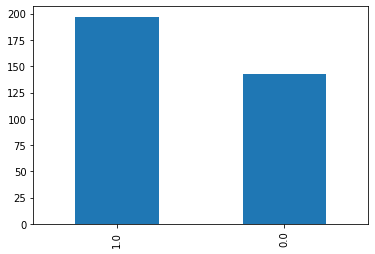

In [14]:
# Distribution of the target variable
data[target].value_counts().plot(kind='bar')

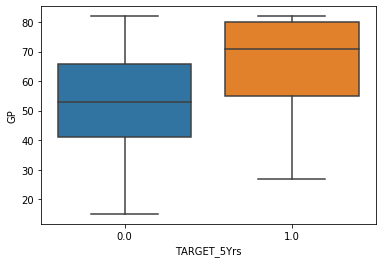

In [15]:
# Distribution of GP feature w.r.t the target variable
sns.boxplot(x=target,y="GP",data=data)

In [32]:
# sns.set_theme(style="ticks")
# palette = {0: "r", 1:"g"}
# screening_df = data.copy()

# g = sns.pairplot(screening_df, hue=target, palette = palette, height=2, aspect=1)
# g.fig.subplots_adjust(top=0.95)
# g.fig.suptitle('Initial pair plot');

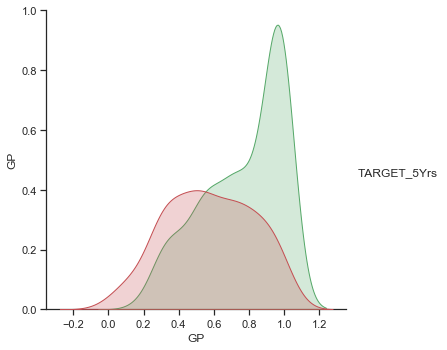

In [33]:
sns.set_theme(style="ticks")
palette = {0: "r", 1:"g"}
screening_df = data[['GP', target]]

g = sns.pairplot(screening_df, hue=target, palette = palette, height=5, aspect=1)
g.fig.subplots_adjust(top=0.95)

### Lets see the correlation

In [18]:
corr = data.corr(); corr

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.585442,0.541873,0.543791,0.498390,0.412855,0.028728,0.007116,0.010062,0.489928,0.486963,0.216555,0.432092,0.461414,0.467634,0.375432,0.463532,0.267598,0.500854,0.371993
MIN,0.585442,1.000000,0.923102,0.916368,0.914145,0.271284,0.293994,0.301068,0.110584,0.810921,0.797864,0.224770,0.630459,0.757799,0.738183,0.633270,0.784057,0.445096,0.855938,0.257690
PTS,0.541873,0.923102,1.000000,0.991684,0.975156,0.314750,0.268301,0.269796,0.119202,0.893321,0.876897,0.240519,0.645644,0.731677,0.726584,0.518860,0.707313,0.471736,0.856304,0.281000
FGM,0.543791,0.916368,0.991684,1.000000,0.982430,0.327967,0.233475,0.239025,0.108445,0.837370,0.826306,0.212986,0.641236,0.722031,0.718434,0.521369,0.702866,0.444889,0.848040,0.293639
FGA,0.498390,0.914145,0.975156,0.982430,1.000000,0.180162,0.326228,0.345663,0.181360,0.800709,0.778850,0.251671,0.563980,0.662599,0.650724,0.554110,0.720860,0.380242,0.843936,0.258104
FG%,0.412855,0.271284,0.314750,0.327967,0.180162,1.000000,-0.297232,-0.353722,-0.327905,0.321959,0.368769,-0.120219,0.513888,0.438674,0.480672,-0.031602,0.106512,0.387067,0.214670,0.337917
3P Made,0.028728,0.293994,0.268301,0.233475,0.326228,-0.297232,1.000000,0.974118,0.559460,0.119215,0.061024,0.275367,-0.189350,-0.026359,-0.085858,0.265703,0.226986,-0.133684,0.181889,-0.147718
3PA,0.007116,0.301068,0.269796,0.239025,0.345663,-0.353722,0.974118,1.000000,0.544011,0.111402,0.053106,0.282642,-0.209683,-0.040702,-0.103676,0.299501,0.259109,-0.145357,0.198680,-0.160024
3P%,0.010062,0.110584,0.119202,0.108445,0.181360,-0.327905,0.559460,0.544011,1.000000,-0.000431,-0.074412,0.379379,-0.263182,-0.171700,-0.209728,0.249347,0.196469,-0.209953,0.093718,-0.091413
FTM,0.489928,0.810921,0.893321,0.837370,0.800709,0.321959,0.119215,0.111402,-0.000431,1.000000,0.978929,0.255370,0.663543,0.721337,0.726186,0.410577,0.617904,0.562841,0.781966,0.248803


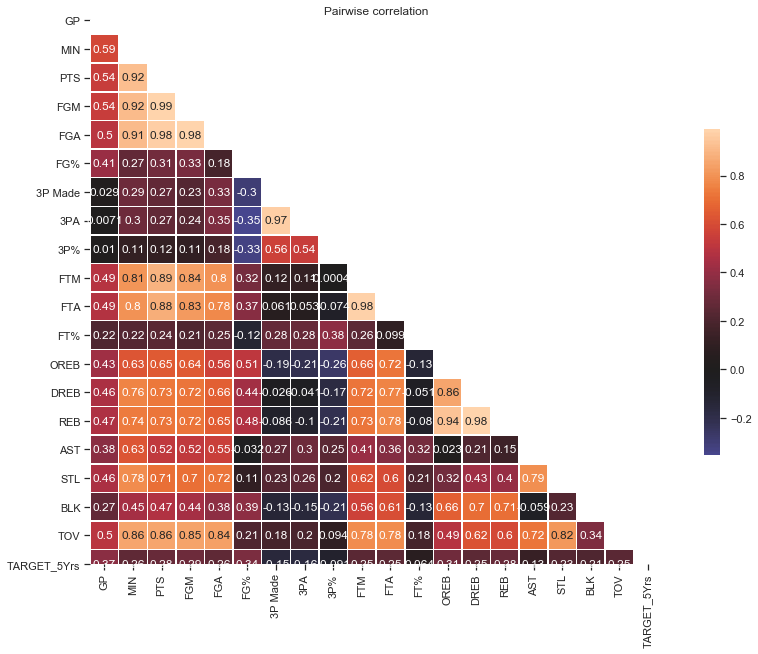

In [19]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
g = sns.heatmap(corr, mask=mask, cmap="icefire", center=0, square=True, linewidths=.5, annot=True,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation')

### Applying minmax scalar to the dataset

In [20]:
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [21]:
features = list(data.columns)
features = [i for i in features if i!=target]

In [22]:
sc=MinMaxScaler()
data[features]=sc.fit_transform(data[features])

In [23]:
data.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,0.313433,0.656338,0.283898,0.264368,0.356383,0.258907,0.3125,0.437500,0.250,0.202703,0.202020,0.659744,0.157895,0.395062,0.324786,0.179245,0.125000,0.102564,0.292683,0.0
1,0.298507,0.642254,0.275424,0.195402,0.308511,0.137767,0.4375,0.583333,0.235,0.337838,0.313131,0.765176,0.105263,0.222222,0.179487,0.349057,0.416667,0.128205,0.365854,0.0
2,0.880597,0.315493,0.190678,0.195402,0.202128,0.437055,0.2500,0.354167,0.244,0.108108,0.101010,0.613419,0.105263,0.185185,0.162393,0.094340,0.166667,0.076923,0.219512,0.0
3,0.641791,0.211268,0.211864,0.229885,0.244681,0.446556,0.0625,0.104167,0.226,0.108108,0.101010,0.643770,0.236842,0.086420,0.136752,0.075472,0.208333,0.025641,0.219512,1.0
4,0.492537,0.208451,0.161017,0.149425,0.111702,0.679335,0.0000,0.020833,0.000,0.162162,0.161616,0.619808,0.236842,0.160494,0.188034,0.028302,0.083333,0.102564,0.170732,1.0


- **We can see how the scalar changed the data in each columns.**

### Splitting data

In [24]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42, stratify=data[target])

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (272, 20)
Shape of train dataset : (68, 20)


In [25]:
train[target].value_counts()

1.0    158
0.0    114
Name: TARGET_5Yrs, dtype: int64

In [26]:
test[target].value_counts()

1.0    39
0.0    29
Name: TARGET_5Yrs, dtype: int64

In [27]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

### Training

In [28]:
model = RandomForestClassifier(n_estimators=10, random_state=12)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Random Forest Classifier is : {accuracy*100}%')

The accuracy of the Random Forest Classifier is : 64.70588235294117%


In [29]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=5)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Gradient Boosting Classifier is : {accuracy*100}%')

The accuracy of the Gradient Boosting Classifier is : 72.05882352941177%


In [30]:
model = LogisticRegression(penalty='l1',random_state=0,max_iter=9,solver='liblinear')
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Ada Boosting Classifier is : {accuracy*100}%')

The accuracy of the Ada Boosting Classifier is : 64.70588235294117%


### OBSERVATIONS

- **The dataset consists of 340 records and 22 features.**
- **From the heatmap we can see that some of the features are correlated to each other.**
- **We trained the model using three different models.**
- **All models have almost same accuracy but the Gradient Boosting Classifier performs better.**
- **We can still improve the model by adding extra features using the present features.**
- **We can also use ensemble of different models to achieve better results compared to single model.**